[ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 180
 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360
 370 380 390 400]
10
b'Molecular Dynamics Project\n10\n10\n'
b''
20
b'Molecular Dynamics Project\n20\n10\n'
b''
30
b'Molecular Dynamics Project\n30\n10\n'
b''
40
b'Molecular Dynamics Project\n40\n10\n'
b''
50
b'Molecular Dynamics Project\n50\n10\n'
b''
60
b'Molecular Dynamics Project\n60\n10\n'
b''
70
b'Molecular Dynamics Project\n70\n10\n'
b''
80
b'Molecular Dynamics Project\n80\n10\n'
b''
90
b'Molecular Dynamics Project\n90\n10\n'
b''
100
b'Molecular Dynamics Project\n100\n10\n'
b''
110
b'Molecular Dynamics Project\n110\n10\n'
b''
120
b'Molecular Dynamics Project\n120\n10\n'
b''
130
b'Molecular Dynamics Project\n130\n10\n'
b''
140
b'Molecular Dynamics Project\n140\n10\n'
b''
150
b'Molecular Dynamics Project\n150\n10\n'
b''
160
b'Molecular Dynamics Project\n160\n10\n'
b''
170
b'Molecular Dynamics Project\n170\n10\n'
b''
180
b'Molecular Dynam

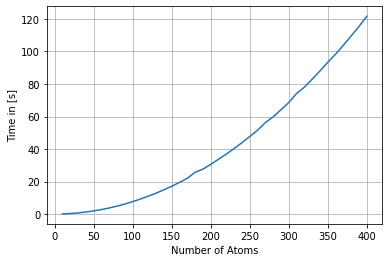

In [6]:
#imports
import matplotlib.pyplot as plt
import numpy as np
from subprocess import Popen,PIPE
import time

#folder bs
programbasePath = "/home/cm/CLionProjects/MDCode/cmake-build-release/"
programName = "myproject"
programCall = programbasePath + programName

#main variables
#atomcount = np.ceil(np.logspace(1., 4., num= 24)) #M6
atomcount = (np.arange(40) +1)*10                  #M5
print(atomcount)
times = []
relaxationTime = 10.0 #low so it does not explode and we do not care anyways
#
def functionCaller(nbAtoms):
    '''this function should help with the computational complexy of the function
    and just calls it with different numbers of atoms and then safes a graph
    '''
    #
    start = time.time()
    print(nbAtoms)
    #calls time to call is just overhead that ocurrs always
    #was run with time and in python (33.169 vs 33.246 for 48 atoms) for me the offset is aceptable
    process = Popen([programCall,str(nbAtoms),str(relaxationTime)],stdout = PIPE, stderr= PIPE)
    Popen.wait(process)
    end = time.time()
    stdout, stderr = process.communicate()
    print(stdout)
    print(stderr)
    #print(end-start)
    return end -start

#run a bunch of times
for i in atomcount:
    times.append(functionCaller(i))

#plot
print(times)
print(atomcount)
plt.plot(atomcount,times)
plt.xlabel("Number of Atoms")
plt.ylabel("Time in [s]")
plt.grid()
plt.savefig('plotAtomTimesM5.png')
plt.show()

In [ ]:
#data safe till 144 atoms
magicList = [1.2753801345825195, 4.20757794380188, 9.18721866607666, 16.336894989013672, 24.168758630752563, 33.506770610809326, 46.08373188972473, 59.46736812591553, 74.72118306159973, 94.47463345527649, 111.21811723709106, 131.6394121646881, 152.66178345680237, 179.6160707473755, 203.14466953277588, 232.22742199897766, 261.6146478652954, 287.0486648082733]
magicArray = (np.arange(18) +1)*8
plt.plot(magicArray ,magicList)
plt.xlabel("Number of Atoms")
plt.ylabel("Time in [s]")
plt.grid()
plt.savefig('plotAtomTimes.png')
plt.show()

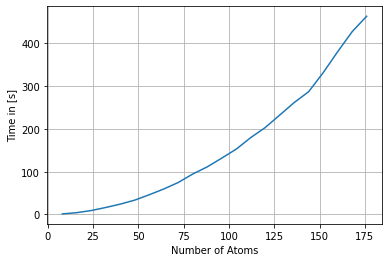

In [51]:
#data safe till 176 run on two different occacions
datalist = [1.2753801345825195, 4.20757794380188, 9.18721866607666, 16.336894989013672, 24.168758630752563, 33.506770610809326, 46.08373188972473, 59.46736812591553, 74.72118306159973, 94.47463345527649, 111.21811723709106, 131.6394121646881, 152.66178345680237, 179.6160707473755, 203.14466953277588, 232.22742199897766, 261.6146478652954, 287.0486648082733, 331.37267446517944, 380.43633675575256, 427.25043082237244, 463.3071937561035]
dataarray = (np.arange(18+4) +1)*8
plt.plot(,times)
plt.xlabel("Number of Atoms")
plt.ylabel("Time in [s]")
plt.grid()
plt.savefig('plotAtomTimes.png')
plt.show()

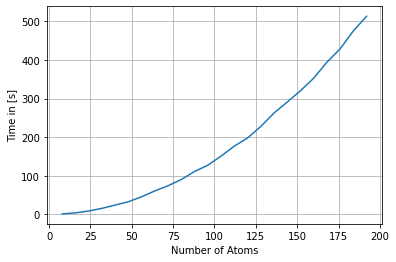

In [56]:
#run till 192 as you can see the orignal crashed while plotting oversight by me btw
datalist = [1.198791265487671, 3.967493772506714, 8.7883882522583, 15.605122566223145, 24.176962852478027, 32.87297296524048, 45.74373507499695, 60.98107290267944, 74.32088994979858, 90.4915418624878, 111.26894021034241, 127.44833827018738, 151.1162302494049, 176.9047110080719, 198.00833773612976, 227.88586950302124, 262.7821545600891, 291.1886696815491, 320.5733160972595, 353.153391122818, 394.6906108856201, 429.22401690483093, 475.9748775959015, 513.5912191867828]
dataarray = (np.arange(24) +1)*8
plt.plot(dataarray,datalist)
plt.xlabel("Number of Atoms")
plt.ylabel("Time in [s]")
plt.grid()
plt.savefig('plotAtomTimes.png')
plt.show()

0.013842547476728528 0.011592682987333514 0.96301358020332


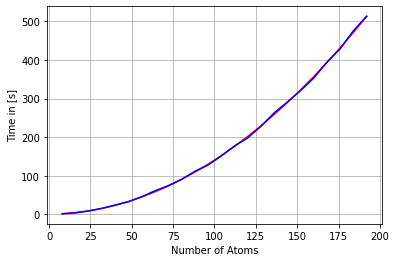

In [62]:
#curve fitting part
from scipy.optimize import curve_fit
datalist = [1.198791265487671, 3.967493772506714, 8.7883882522583, 15.605122566223145, 24.176962852478027, 32.87297296524048, 45.74373507499695, 60.98107290267944, 74.32088994979858, 90.4915418624878, 111.26894021034241, 127.44833827018738, 151.1162302494049, 176.9047110080719, 198.00833773612976, 227.88586950302124, 262.7821545600891, 291.1886696815491, 320.5733160972595, 353.153391122818, 394.6906108856201, 429.22401690483093, 475.9748775959015, 513.5912191867828]
dataarray = (np.arange(24) +1)*8

def expectedFunction(x,a,b,c):
    ''' quadratic function for fitting
    '''
    return a*x**2 + b*x +c

#fitting
param, _ = curve_fit(expectedFunction,dataarray,datalist)
a, b,c = param[0], param[1], param[2]

yQuad = expectedFunction(dataarray,a,b,c)
print(a,b,c)
#plotting
plt.plot(dataarray,yQuad,'r')
plt.plot(dataarray,datalist,'b')
plt.xlabel("Number of Atoms")
plt.ylabel("Time in [s]")
plt.grid()
plt.show()
#shown that this is quadratic :)

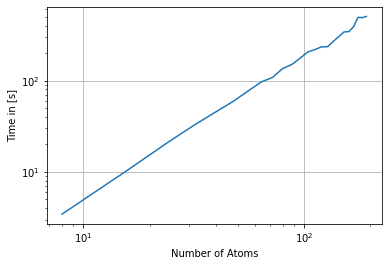

In [2]:
#another datastorage for loglog
datalist = [3.4559271335601807, 10.620983362197876, 20.869689226150513, 32.88846468925476, 45.646764516830444, 59.634239196777344, 77.30670642852783, 96.52227473258972, 108.20272445678711, 135.2084925174713, 149.66701459884644, 175.33814001083374, 205.34512424468994, 217.9577910900116, 233.71963763237, 234.70637226104736, 269.15322732925415, 302.68757152557373, 340.57399797439575, 343.3688290119171, 389.59023571014404, 492.0530152320862, 488.29906129837036, 503.02829241752625]
dataarray = (np.arange(24) +1)*8
#
plt.loglog(dataarray,datalist)
plt.xlabel("Number of Atoms")
plt.ylabel("Time in [s]")
plt.grid()
plt.savefig('plotAtomTimes.png')
plt.show()

[  8  16  24  32  40  48  56  64  72  80  88  96 104 112 120 128 136 144
 152 160 168 176 184 192 200 208 216 224 232 240 248 256 264 272 280 288
 296 304 312 320]


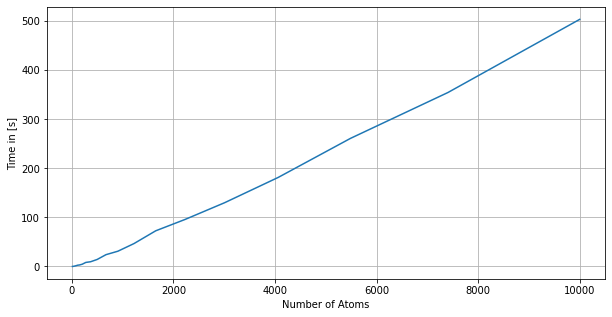

In [3]:
#another datastorage 
datalist = [0.07174301147460938, 0.11491942405700684, 0.19524025917053223, 0.24104928970336914, 0.3861656188964844, 0.6601800918579102, 1.0432684421539307, 1.5983726978302002, 2.5788164138793945, 3.1068296432495117, 4.5797343254089355, 8.261826992034912, 9.666111707687378, 14.30401062965393, 24.1014187335968, 31.12266993522644, 46.68522357940674, 72.73071479797363, 95.86747169494629, 130.03361749649048, 181.51940298080444, 261.1015236377716, 354.6843581199646, 503.75037693977356]
dataarray = np.ceil(np.logspace(1., 4., num= 24))
print(atomcount)
#
plt.figure(figsize = (10,5))
plt.plot(dataarray,datalist)
plt.xlabel("Number of Atoms")
plt.ylabel("Time in [s]")
plt.grid()
plt.savefig('plotAtomTimesCutoffNew.png')
plt.show()